In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_0_1 = pd.read_excel('Selected_molecules_from_0_1_tensor_scaling.xlsx')

In [3]:
print(data_0_1.head())
print(len(data_0_1))

   Unnamed: 0                                        SMILES  molecular_weight  \
0           0  CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2        335.121609   
1           1      CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12        289.088498   
2           2     CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C        301.099731   
3           3     CCC(=O)NCC(C1)=NN=C(C2=CC=C(C)C(CF)=C2)S1        307.115461   
4           4   CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C        346.126360   

      logp  h_bond_donors  h_bond_acceptors  rotatable_bonds  \
0  1.83410              4                 5                5   
1  1.09228              0                 4                3   
2  2.10890              1                 5                2   
3  2.84012              1                 4                5   
4  2.83200              2                 4                5   

   Polar surface area  aromatics rings  Lipinski alerts - to QED calc  \
0               70.98                2                 

In [4]:
data_0_6 = pd.read_excel('Selected_molecules_from_0_2_tensor_scaling.xlsx')

In [5]:
print(data_0_6.head())
print(len(data_0_6))

   Unnamed: 0                                          SMILES  \
0           0             C1CC(=O)NCCC(SC2=N[NH1]C=N2)C1(CC)C   
1           1           CCC(=O)NC1CC(C2=N[NH1]C=C2C(C)=C=N)O1   
2           2  CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)[NH1]N=2   
3           3     CCC(=O)NCC1=C2N=C(CC3=N[NH1]C(C)=C3Cl)N1CC2   
4           4             CCC(=O)NCC(F)C1=NSC(C2=CC=CC=N2)=N1   

   molecular_weight     logp  h_bond_donors  h_bond_acceptors  \
0        268.135782  1.98180              2                 4   
1        248.127326  1.37517              3                 4   
2        333.105959  2.13020              2                 5   
3        307.119988  1.74112              2                 4   
4        280.079410  2.13690              1                 5   

   rotatable_bonds  Polar surface area  aromatics rings  \
0                3               70.67                1   
1                4               90.86                1   
2                5               71.31   

In [6]:
QED_LIPINSKI_molecules = pd.read_excel('All_generated_SMILES_QED_Lipinski.xlsx')

In [7]:
print(QED_LIPINSKI_molecules.head())
print(len(QED_LIPINSKI_molecules))

   Unnamed: 0                                        SMILES  molecular_weight  \
0           0  CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2        335.121609   
1           1      CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12        289.088498   
2           2     CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C        301.099731   
3           3     CCC(=O)NCC(C1)=NN=C(C2=CC=C(C)C(CF)=C2)S1        307.115461   
4           4   CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C        346.126360   

      logp  h_bond_donors  h_bond_acceptors  rotatable_bonds  \
0  1.83410              4                 5                5   
1  1.09228              0                 4                3   
2  2.10890              1                 5                2   
3  2.84012              1                 4                5   
4  2.83200              2                 4                5   

   Polar surface area  aromatics rings  Lipinski alerts - to QED calc  \
0               70.98                2                 

In [8]:
QED_LIPINSKI_molecules['0.1_tensor_scaling_prediction'] = 0
QED_LIPINSKI_molecules['0.2_tensor_scaling_prediction'] = 0
for i in range(len(QED_LIPINSKI_molecules)):
    if QED_LIPINSKI_molecules['SMILES'][i] in list(data_0_1['SMILES']):
        QED_LIPINSKI_molecules['0.1_tensor_scaling_prediction'][i] = 1
    elif QED_LIPINSKI_molecules['SMILES'][i] in list(data_0_6['SMILES']):
        QED_LIPINSKI_molecules['0.2_tensor_scaling_prediction'][i] = 1
    else:
        
        print('Not found in first and second prediction dataset '+str(QED_LIPINSKI_molecules['SMILES'][i]))
for i in range(len(QED_LIPINSKI_molecules)):
    if QED_LIPINSKI_molecules['SMILES'][i] in list(data_0_6['SMILES']):
        QED_LIPINSKI_molecules['0.2_tensor_scaling_prediction'][i] = 1
    elif QED_LIPINSKI_molecules['SMILES'][i] in list(data_0_1['SMILES']):
        QED_LIPINSKI_molecules['0.1_tensor_scaling_prediction'][i] = 1
    else:
        
        print('Not found in first and second prediction dataset '+str(QED_LIPINSKI_molecules['SMILES'][i]))

In [9]:
QED_LIPINSKI_molecules.head()

,Unnamed: 0,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,0.1_tensor_scaling_prediction,0.2_tensor_scaling_prediction
0,0,CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2,335.121609,1.83410,4,5,5,70.98,2,1,1,0.629409,1,0
1,1,CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12,289.088498,1.09228,0,4,3,74.06,1,0,1,0.834638,1,0
2,2,CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C,301.099731,2.10890,1,5,2,74.81,2,1,1,0.862074,1,0
3,3,CCC(=O)NCC(C1)=NN=C(C2=CC=C(C)C(CF)=C2)S1,307.115461,2.84012,1,4,5,53.82,1,0,1,0.909168,1,0
4,4,CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C,346.126360,2.83200,2,4,5,58.95,2,1,1,0.818708,1,0


In [10]:
del QED_LIPINSKI_molecules['Unnamed: 0']

In [11]:
QED_LIPINSKI_molecules

,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,0.1_tensor_scaling_prediction,0.2_tensor_scaling_prediction
0,CCC(=O)NCC1=CC=NN1S2C=C(C3=CC=CC=C3F)N[NH1]2,335.121609,1.83410,4,5,5,70.98,2,1,1,0.629409,1,0
1,CCC(=O)N1CC2C(C#N)(S(=O)C3=CC=CC=N3)CC12,289.088498,1.09228,0,4,3,74.06,1,0,1,0.834638,1,0
2,CCC(=O)N1C=2C=CN(C3=NC=NC(C#N)=C3C)C=2S1C,301.099731,2.10890,1,5,2,74.81,2,1,1,0.862074,1,0
3,CCC(=O)NCC(C1)=NN=C(C2=CC=C(C)C(CF)=C2)S1,307.115461,2.84012,1,4,5,53.82,1,0,1,0.909168,1,0
4,CCC(=O)NCC1=CC=NN1S=2C=C(C3=CC=CC=C3F)NC=2C,346.126360,2.83200,2,4,5,58.95,2,1,1,0.818708,1,0
5,CCC(=O)NC1C=C2N(C3=NC(CC=C3)C=C2)C1C,257.152812,1.76600,1,3,2,44.70,0,0,1,0.819055,1,0
6,CCC(=O)NCC1=CC=NN1N2[NH1]C3=C(C2CC3C)NO,292.164774,-0.03570,4,7,5,94.45,1,1,1,0.569199,1,0
7,CCC(=O)NCC=C1N=C(CC2=N[NH1]C3=C2CCO3)[NH1]C=C1,301.153875,0.81260,3,5,5,91.40,1,0,1,0.750407,1,0
8,CCC(=O)NCC1C(C2=N[NH1]C=C2C(C)(C)O)N=C1N,279.169525,0.19140,4,5,5,116.39,1,0,1,0.615305,1,0
9,C1CC(=O)NCC=CC=NN=C1C(C)C2=CC=CS2N,292.135782,1.80160,3,4,2,79.84,0,1,1,0.678485,1,0


In [12]:
QED_LIPINSKI_molecules.to_excel("All_generated_SMILES_QED_Lipinski.xlsx")

In [13]:
from rdkit import Chem
from rdkit.Chem import Draw

In [14]:
mols_01 = [Chem.MolFromSmiles(smi) for smi in QED_LIPINSKI_molecules.loc[QED_LIPINSKI_molecules['0.1_tensor_scaling_prediction'] == 1]['SMILES']]

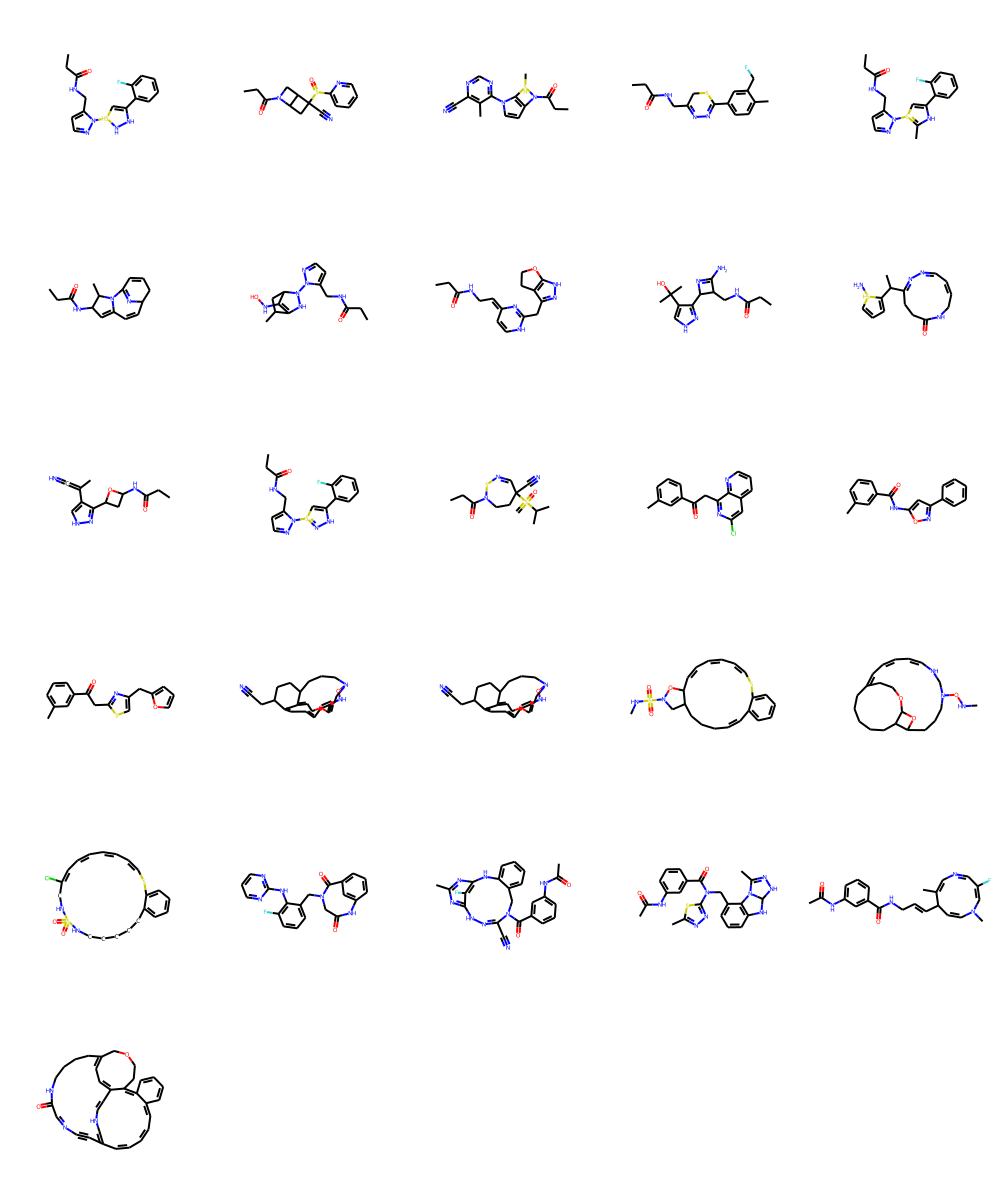

In [15]:
Draw.MolsToGridImage(mols_01, molsPerRow=5)

In [16]:
mols_06 = [Chem.MolFromSmiles(smi) for smi in QED_LIPINSKI_molecules.loc[QED_LIPINSKI_molecules['0.2_tensor_scaling_prediction'] == 1]['SMILES']]

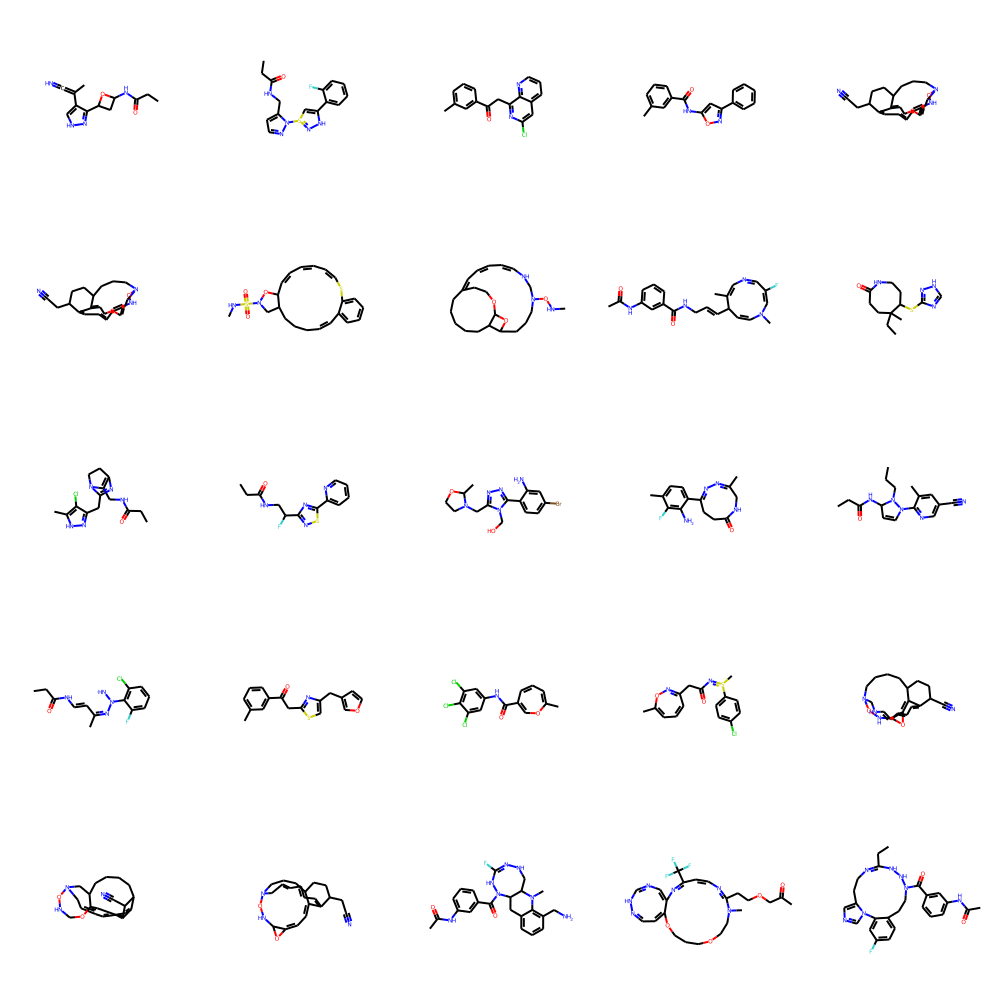

In [17]:
Draw.MolsToGridImage(mols_06, molsPerRow=5)